<a href="https://colab.research.google.com/github/olimpiarivera/ML-notebook/blob/main/01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Let us consider the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In the dataset we have data regarding specific species of flowers :
- Sepal length;
- Sepal width;
- Petal length;
- Petal width;
- Species (*Iris setosa*, *Iris virginica* e *Iris versicolor*).

In the specific, we have N = 150 total samples (50 per class).

<img src='https://drive.google.com/uc?id=1cBVClKfJOVXwK-VCjwd9XzRgCN-wvec_' width=250>

## Loading


We need to import **matplotlib** and **pandas** to handle data and plots.

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

We can find the dataset we need to analyse online. We use pandas to load the csv to a **pandas.DataFrame**.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

We can start to have a look the data we have

In [ ]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


we do not care about the flower species in this lesson, hence we remove that column:

In [ ]:
dataset = dataset.drop('class', axis=1)

In [ ]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We will try to understand how the feature are distributed, by printing some statistics:

In [ ]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Visualizing data can also be very helpful:

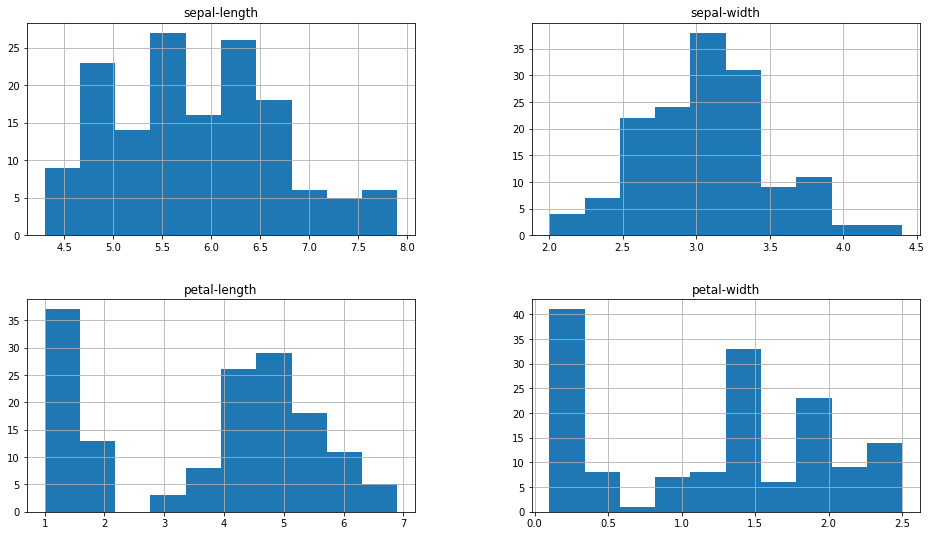

In [ ]:
dataset.hist(figsize=(16,9))
plt.show()

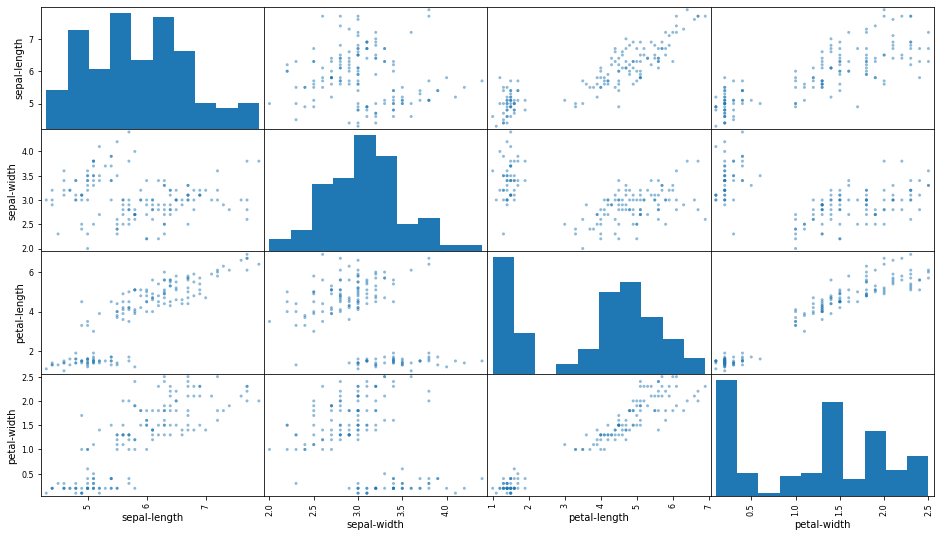

In [ ]:
scatter_matrix(dataset, figsize=(16, 9))
plt.show()

*petal-lenght* and *petal-width* seem to have a strong relationship... we should investigate it more in detail! 

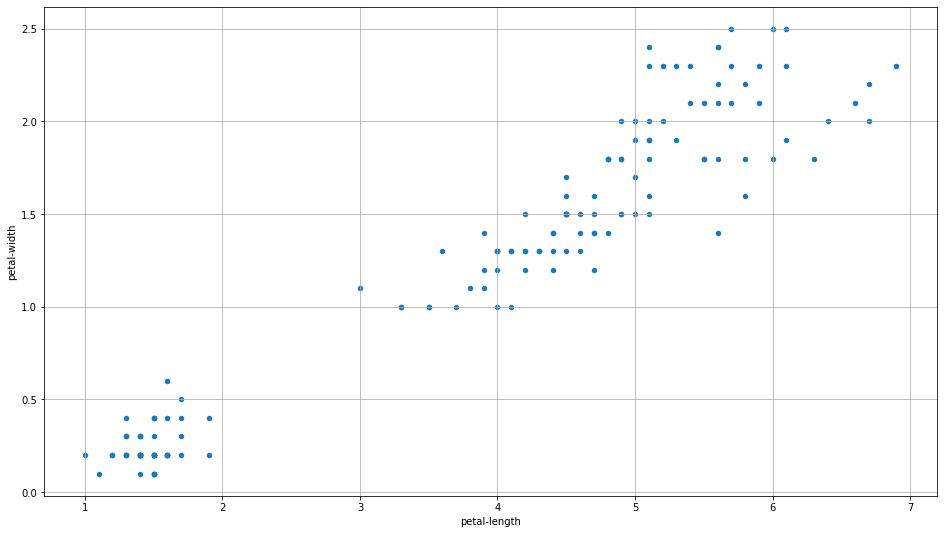

In [ ]:
dataset.plot.scatter('petal-length', 'petal-width', grid=True, figsize=(16,9))

## Preprocessing

Once we inspected the data, we should operate some preprocessing procedures. On a
generic dataset one should perform:

- shuffling;
- remove inconsistent data;
- remove outliers;
- normalize or standardize data;
- fill missing data.

In this case we are going to use the entire dataset, with a non-iterative method, hence we do not need to **shuffle**.

There seems not to be **outliers** from previous inspection.

Is there any **missing data**?

In [ ]:
import numpy as np

In [ ]:
np.any(np.isnan(dataset.values))

False

we are lucky, no missing data, no outliers... 

However it is always better to work with data in the same scale, hence we should normalize the columns we are going to use.

\begin{align*}
	s &\leftarrow \frac{s - \bar{s}}{S} \\
	s &\leftarrow \frac{s - \bar{s}}{\max_n \{ s_n \} - \min_n \{ s_n \}}
\end{align*}

The **zscore** function operates a standardization of its inputs.

In [ ]:
from scipy.stats import zscore

In [ ]:
x = zscore(dataset['petal-length'].values).reshape(-1, 1) # we reshape our feature column as a (n_sample, n_features) matrix
y = zscore(dataset['petal-width'].values)

## Using Scikit-Learn Toolbox

A linear model seems to be a good choice to predict *petal-width* given petal-length, let's use **scikit-learn** tools to do a linear regression:


In [ ]:
from sklearn import linear_model

In [ ]:
lin_model = linear_model.LinearRegression()
lin_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

since we want to customize our plot, we will use matplotlib directly this time:

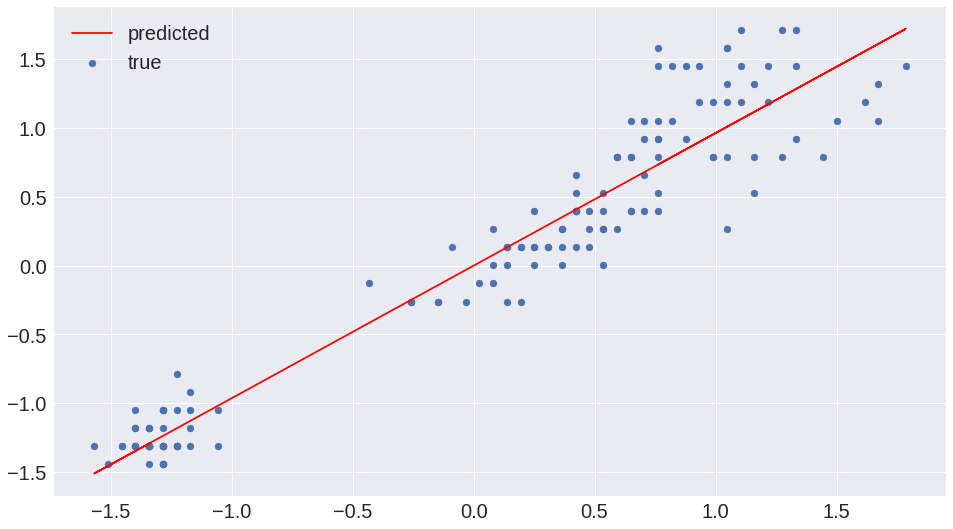

In [ ]:
 with plt.style.context('seaborn'): # use your favorite style, if you don't like the standard one
  plt.figure(figsize=(16,9))
  plt.scatter(x, y, label='true') 

  w1 = lin_model.coef_ # weights of the model are stored here
  w0 = lin_model.intercept_ # and here it is the intercept

  # Compute the y component of the regression line

  y_pred = lin_model.predict(x)
  #y_pred = [w1 * sample + w0 for sample in x.flatten()] 

  # (we used a list comprehension here, have a look to the python tutorial
  #  if you don't know what it is!)

  plt.plot(x, y_pred, label='predicted', color='red')

  # enlarging fonts
  plt.legend(prop={'size': 20})
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)

  plt.show()

To evaluate the quality of our regression we can analyse some metrics:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

### Residual Sum of Squares 

$RSS = \sum_n (\hat{t}_n-t_n)^2$, it tells us how much of the prediction differs from the true value.

In [ ]:
lin_model._residues

10.964815811699454

### Coefficient of determination 

$R^2 = 1 - \frac{RSS}{\sum_n (\bar{t}-t_n)^2}$, it tells us how the fraction of the variance of the data explained by the model (how much better we are doing w.r.t. just using the mean of the target $\bar{t} = \frac{\sum_n t_n}{N}$).

In spaces with a single feature this is equal to the correlation coefficient between the input and the output;

For a more detailed explanation: https://en.wikipedia.org/wiki/Coefficient_of_determination

In [ ]:
r2_score(y, y_pred)

0.9269012279220037

### Mean Squared Error

$MSE = \frac{\sum_n (\hat{t}_n-t_n)^2}{N}$, it tells approximately how much error we get on a predicted data over the training set (i.e., a normalized version of the RSS).

In [ ]:
 mean_squared_error(y, y_pred)

0.07309877207799637

Under the assumption that the observations $t_n$ are i.i.d. and satisfies $t_n = w_0 + \sum_j w_j x_{nj} + \epsilon$, where $\epsilon$ is a Gaussian noise with zero mean and variance $\sigma^2$ (i.e., the data are generated by a linear model with noise), the computed coefficients $\hat{w}_j$ are distributed as follows:
\begin{equation*}
	\frac{\hat{w}_j - w_j}{\hat{\sigma} \sqrt{v_j}} \sim t_{N - M -1}
\end{equation*}
where $w_j$ is the true parameter, $\hat{\sigma}$ is the unbiased estimated for the target variance, i.e., $\hat{\sigma}^2 = \frac{\sum_n (t_n - \bar{t}_n)^2}{N - M - 1}$, $v_j$ is the $j$-th diagonal element of the matrix $(X^T X)^{-1}$ and $t_{N - M}$ is the t-student distribution with $N - M - 1$ degrees of freedom.

This allow us to formulate some **statistical tests**:

### Single coefficients statistical test:
$$H_0: w_j = 0 \qquad \text{ vs. } \qquad H_1: w_j \neq 0$$
\begin{equation*}
t_{stat} = \frac{\hat{w}_j - w_j}{\hat{\sigma} \sqrt{v_j}} \sim t_{N - M - 1}
\end{equation*}
where $t_{N - M - 1}$ is the T-Student distribution with $N-M-1$ degrees of freedom

### Overall significance of the model: F-statistic

It considers the following hypothesis test:

$$H_0: w_0 = w_1 = \dots = w_M = 0 \text{ vs. }  H_1: \exists w_j \neq 0$$


The F-statistic can be computed and is distributed as follows:
$$ F = \frac{dfe}{M - 1}\frac{\sum_n (\hat{t}_n-t_n)- RSS}{RSS} \sim F_{M-1, N-M} $$

where $F_{M-1, N-M}$ is the Fisher-Snedecor distribution with parameters $M-1$ and $N-M$.

In [ ]:
f_regression(x, y) # it outputs a tuple: (value of the F-statistics, its p-value)

(array([1876.65781288]), array([5.77666099e-86]))

If one wants all the information about the output of a linear model in a single instruction, just use the library **statsmodels** and use the function **summary()** on the result of the Ordinary Least Square optimization procedure

In [ ]:
from statsmodels import api as sm
lin_model2 = sm.OLS(x, y).fit()
print(lin_model2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              1889.
Date:                Fri, 12 Mar 2021   Prob (F-statistic):                    1.56e-86
Time:                        14:14:14   Log-Likelihood:                         -16.645
No. Observations:                 150   AIC:                                      35.29
Df Residuals:                     149   BIC:                                      38.30
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
lin_model2._results.params

array([0.9627571])

In [ ]:
lin_model2._results.k_constant

0

## Custom Implementation

We can also implement Least-Squares from scratch, using its closed-form:

\begin{equation}
\hat{\mathbb{w}}_{OLS} = (\mathbb{\Phi}^{\top}\mathbb{\Phi})^{-1}\mathbb{\Phi}^{\top}\ \mathbb{t},
\end{equation}

where $\mathbb{\Phi}= (\phi(x_1), \dots, \phi(x_N))^{\top}$ and $\mathbb{t} = (t_1, \dots, t_N)^{\top}.$

By using **numpy**:


In [ ]:
from numpy.linalg import inv

n_samples = len(x)
Phi = np.ones((n_samples, 2))
Phi[:, 1] = x.flatten() # the second column is the feature
# the field 'T' represents the transposed matrix, @ is the matrix product, the method 'dot' is the matrix product
w = inv(Phi.T @ Phi) @ (Phi.T.dot(y))  

In [ ]:
w

array([-4.73835865e-16,  9.62757097e-01])

## Regularization

If we need to mitigate over-fitting effects in a model we might resort to some regularization techniques, like Ridge regression or Lasso regression.

### Ridge Regression
Linear least squares with l2 regularization.

In [ ]:
ridge_model = linear_model.Ridge(alpha=10)
ridge_model.fit(x, y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

### Lasso Regression

Linear Model trained with L1 prior as regularizer.

In [ ]:
lasso_model = linear_model.Lasso(alpha=10)
lasso_model.fit(x, y)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

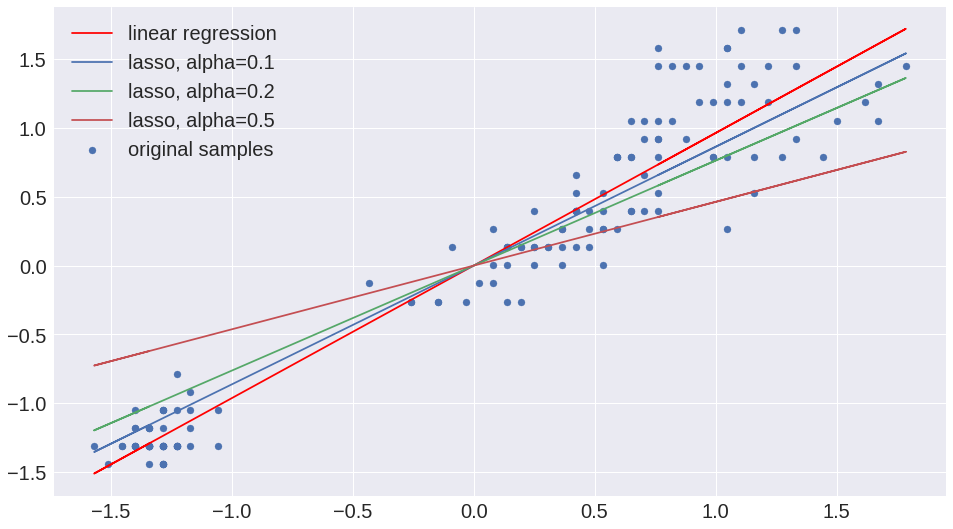

In [ ]:
 with plt.style.context('seaborn'):
  plt.figure(figsize=(16,9))
  plt.scatter(x, y, label='original samples')
  y_linear = [lin_model.coef_ * x_i + lin_model.intercept_ for x_i in x]
  plt.plot(x, y_linear, label='linear regression', color='red')
  for alpha in [0.1, 0.2, 0.5]:    
    # lasso regression
    lasso_model = linear_model.Lasso(alpha=alpha)
    lasso_model.fit(x, y)
    y_lasso = [lasso_model.coef_ * x_i + lasso_model.intercept_ for x_i in x]
    plt.plot(x, y_lasso, label='lasso, alpha={}'.format(alpha))


  # enlarging fonts
  plt.legend(prop={'size': 20})
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)

  plt.show()

# Nuova sezione

In [ ]:
mean_squared_error(y, lasso_model.predict(x))

0.3230987720779964

## Homeworks

Here we propose some exercises in python for you. They are not mandatory, but they can be helpful to better understand the contents of the lecture, by giving you the opportunity to develop some code by yourself.

### 1) Predicting petal width

Consider again the Iris dataset, and complete the following code, by writing a script which is able to predict the petal width by using, this time, **all** the other features as input.


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Get input and output
x = ### WRITE YOUR CODE HERE ###
y = zscore(dataset['petal-width'].values)

# Fit your model
### WRITE YOUR CODE HERE ###

Comment on the parameters we would like to introduce or exclude from the prediction process. 

Does this model is better than the one trained with a single input?

How do you check if the two models are significantly different from each other? 

*(hint: look at the exercise session on Bias-Variance tradeoff)*

### 2) Implementing closed-form ridge regression
Ridge regression can be obtained in closed form, as we have seen at lesson. Implement it by yourself, by completing the code below.

In [ ]:
alpha = 100
ridge_model = linear_model.Ridge(alpha=alpha)
ridge_model.fit(x, y)


w = ### WRITE YOUR CODE HERE ###

# Compare your solution it with the scikit-learn one!
assert np.isclose(w, ridge_model.coef_), 'Something wrong!, try again...'

In [ ]:
### Solution - TO BE REMOVED
# N = len(x)
# Phi = np.ones((N, 2))
# Phi[:, 1] = x.flatten() # the second column is the feature
# # the field 'T' represents the transposed matrix, the method 'dot' is the matrix product
# ridge_mpinv = inv(alpha * np.eye(2) + Phi.T.dot(Phi)).dot(Phi.T); 
# w = ridge_mpinv.dot(y);

### 3) Implementing LS for multiple outputs 

We have seen at lesson that LS is possible also when we have multiple outputs.

Implement it by extending the LS custom implementation that we have seen.

In [ ]:
### WRITE YOUR CODE HERE ###

### 4) Try it on another dataset

Try to repeat the procedure that we have seen for the Iris dataset on a new dataset of your choice:

- select a dataset (many are available online, e.g. https://www.kaggle.com/datasets)
- visualize data, in order to spot interesting relationships
- preprocess data
- apply linear regression

In [ ]:
### WRITE YOUR CODE HERE ###